# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solution to Assignment 6 posted on JupyterHub and Canvas
 - Phase 1 of Design Project due 12/6
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)
 - Phase 2 will be assigned by 11/29
     - Final submission due 12/19

## Week 8

 - Art of Electronics (AoE) Chapter 6
 - Microelectronics (Sedra and Smith) Chapter 14

## Overview

 - Last time...
     - BJT noise model
     - MOSFET noise model
     - Opamp noise model
     - Analyzing noise in opamp circuits
     - Minimizing noise
 - Today...
     - Noise filtering
     - Butterworth, Chebyshev, and Bessel filters
     - Sallen–Key filter architecture

## Python packages/modules

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_logx2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1, 'b')
    ax.semilogx(x, y2, 'r', marker = 'o', markersize ='3', linestyle='None')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_logx3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y1)
    ax.semilogx(x, y2)
    ax.semilogx(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
 
def plot_x3y(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1)
    ax.plot(x, y2)
    ax.plot(x, y3)
    ax.legend( [y1label,y2label,y3label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))
    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_freqtrans(f, mag, x1label, y1label, tin, tran, x2label, y2label):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    axs[0].semilogx(f, 20*np.log10(mag))       
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])    
    
def plot_multifreqtrans(f, mags, x1label, y1label, tin, trans, x2label, y2label, labels):
    fig, axs = plt.subplots(2, figsize = (10.0, 9));
    
    for mag in mags:
        axs[0].semilogx(f, 20*np.log10(mag))
        
    axs[0].legend( labels ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.2))    
    axs[0].grid()
    axs[0].set_xlabel(x1label)
    axs[0].set_ylabel(y1label)
        
    for tran in trans:
        axs[1].plot(tin, tran)  
    axs[1].grid()
    axs[1].set_xlabel(x2label)
    axs[1].set_ylabel(y2label)
    
    fig.align_ylabels(axs[:])
    
def SK_lowpass(Q, cn, fc, n, C, K):
   
    d = (n*(1-K)+1)
    a = d**2*Q**2
    b = 2*Q**2*d-n
    c = a
    
    m_a = (-b+np.sqrt(b**2-4*a*c))/2/a
    m_b = (-b-np.sqrt(b**2-4*a*c))/2/a
    
    C1 = C
    C2 = n*C1
    R2 =1/fc/2/np.pi/C1/np.sqrt(m_b*n)/cn
    R1 = R2*m_b

    return C1, C2, R1, R2

In [3]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 8 - Filters

" An ideal electrical filter should not only completely reject the unwanted frequencies but should also have uniform sensitivity for the wanted frequencies."

<right>$-$ *Stephen Butterworth*</right>

## First-order lowpass filter

<center><img src="img/first_order_lowpass.png" width=600 /></center>

\begin{align}
G(s) = \dfrac{V_{out}}{V_{in}} &= -\dfrac{R_2 || Z_C}{R_1}\\
\\
&= -\dfrac{R_2}{R_1}\cdot \dfrac{1}{1+sC_1R_2}
\end{align}

$$ f_{enb} = \dfrac{\pi}{2}f_{3dB} = \dfrac{1}{4R_2C_1} \approx 1.57 \cdot f_{3dB} $$ 

 - We can define the signal bandwidth $f_{sbw}$ as that which limits attenuation to a certain spec (e.g. 1%)
 - The signal bandwidth in this case is
 
$$ \dfrac{1}{\sqrt{1+(2\pi \cdot f_{sbw})^2/(2\pi\cdot f_{3dB})^2}}= 0.99 \rightarrow \boxed{f_{sbw} = 0.14\cdot f_{3dB}} $$
 
 
 - The ratio of noise bandwidth to signal bandwidth for a first-order filter (1% attenuation) is therefore
 
$$ \dfrac{f_{enb}}{f_{sbw}} =  11.2 $$
 
 - For a given $rms$ noise target, this may require an unrealistically low target for noise density for our front-end amplifier

## Filter cascading

 - If we cascade multiple first-order filters, can we do better?
 - The transfer function magnitude in this case is second order:
 
$$ \left|\dfrac{V_{out}}{V_{in}}(f)\right| = \left(\dfrac{1}{\sqrt{1+(2\pi \cdot f)^2/(2\pi \cdot f_0)^2}} \right)^2 $$

 - where $f_0 = \dfrac{1}{2\pi RC} $
 - Although the noise bandwidth is reduced relative to a first-order filter, increased attenuation lowers the signal bandwidth as well, offering only a slight improvement
 - To improve upon this, we need less attenuation in the "pass band" and steeper rolloff

<center><img src="img/filter_cascade.png" width=800 /></center> 

$$ f_{enb} = \dfrac{\pi}{4}\cdot f_{0} $$

$$ \dfrac{1}{1+(2\pi \cdot f_{sbw})^2/(2\pi\cdot f_{0})^2}= 0.99 $$


$$ \rightarrow f_{sbw} = 0.1\cdot f_{0} $$

$$ \dfrac{f_{enb}}{f_{sbw}} \approx 8 $$

## First-order frequency response

 - The dynamic behavior of a first-order filter is fully described by a single parameter, $\omega_0$:
 
$$ H(j\omega) = \dfrac{1}{1 + s/\omega_0} $$

 - $\omega_0$ is the pole frequency, determined by setting the denominator of the transfer function to $0$ and solving for $s_0$ :
 
\begin{align}
1 + s_0/\omega_0 = 0 \rightarrow s_0 = -\omega_0
\end{align}

 - $\omega_0$ is the absolute value of $s$:
 
$$ \omega_0 = |s_0| $$


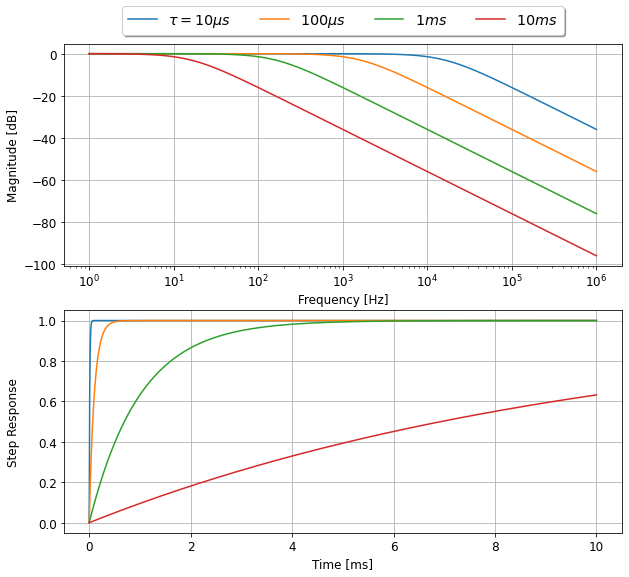

In [4]:
mags = []
trans = []
taus = np.logspace(-5,-2, num = 4)
f = np.logspace(0, 6, num = 1000)
w = 2*np.pi*f
tin = np.linspace(0,1e-2,1000) 

for tau in taus: 
    mags.append(1/np.sqrt(1+(w*tau)**2))
    trans.append(1-np.exp(-tin/tau))
    
labels = [r'$\tau = 10\mu s$', r'$100\mu s$', r'$1 ms$', r'$10 ms$']
    
plot_multifreqtrans(f, mags, 'Frequency [Hz]', 'Magnitude [dB]', 
                    1e3*tin, trans, 'Time [ms]', 'Step Response', labels)

## Second-order filter

 - The "order" of a filter is determined by the number of poles in its transfer function, which for an analog filter corresponds to the number of reactive components (i.e. inductors and capacitors)
 - The response of a second-order filter is governed by two parameters, $\omega_0$ and $Q$
 - The transfer function of a second-order filter is given by
 
$$ H(s) = \dfrac{\omega_0^2}{s^2 + 2\zeta \omega_0 s + \omega_0^2} $$
 - where

$$ Q = \dfrac{1}{2\zeta} $$

 - $\zeta$ is referred to as the *damping factor*, and can be interchangeably with $Q$

## Quality factor (Q)

 - While $\omega_0$ (mostly) determines the speed of settling of the transient response, the *quality* of the response is determined by $Q$
 - A higher value of $Q$ results in more *peaking* in the magnitude response and more *ringing* in the step response
     - A higher value of $Q$ corresponds to a *lower* damping factor $\zeta$ 
 - Peaking can cause more variability in the filter magnitude, which results gain errors at frequencies close to $\omega_0$
 - Let's take a look at the effect of $Q$ on settling...

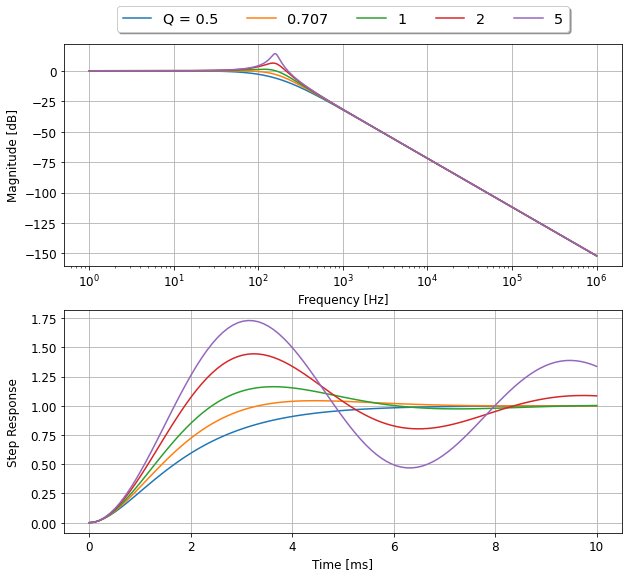

In [5]:
tau = 1e-3
w0 = 1/tau
Q = np.asarray([0.5, 0.707, 1, 2, 5])        
tin = np.linspace(0,10e-3,100) 
labels = ["Q = 0.5", "0.707", "1", "2", "5"]
mags = []
steps = []

for q in Q:
    sys_second = signal.TransferFunction([w0**2], [1, w0/q, w0**2])
    w, mag_second, phase = sys_second.bode(w=w)        
    tout,step_second = signal.step(sys_second, X0=None, T=tin)
    mags.append(10**(mag_second/20))
    steps.append(step_second)
 
plot_multifreqtrans(f, mags, 'Frequency [Hz]', 'Magnitude [dB]', 
                    1e3*tin, steps, 'Time [ms]', 'Step Response', labels)

## Second-order RC filter response

<center><img src="img/filter_cascade.png" width=800></center> 

 - How does the RC filter cascade (with no loading) perform?

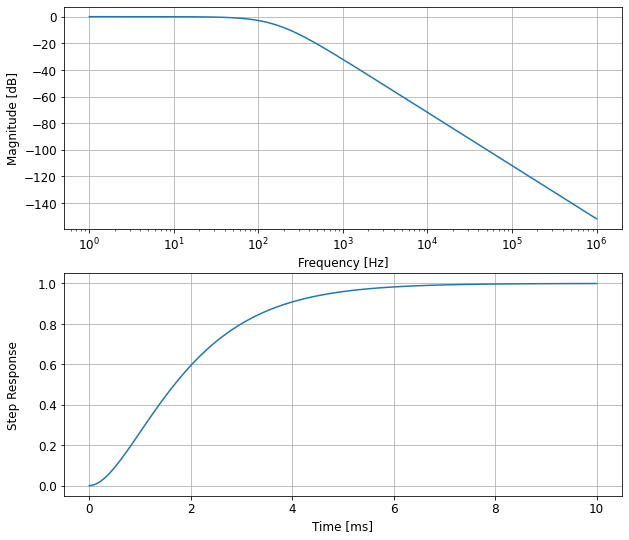

In [6]:
RC_2stage = signal.TransferFunction([w0**2], [1, 2*w0, w0**2])
w, mag_dB, phase_RC_2stage = RC_2stage.bode(w=w)
mag = 10**(mag_dB/20)
tout, step_RC_2stage = signal.step(RC_2stage, X0=None, T=tin)

plot_freqtrans(f, mag, 'Frequency [Hz]', 'Magnitude [dB]', 
        tout*1e3, step_RC_2stage, 'Time [ms]', 'Step Response')

## Frequency-domain filter specifications

 - Passband
    - Region of frequencies with little attenuation (or ripple)
 - Cutoff frequency ($f_c$)
    - End of the passband
 - Transition region
    - Transition from passband to stopband
 - Stopband
    - Defined by a minimum required attenuation above a given frequency

<center><img src="img/filter_specs.png" width=800></center> 

## Time-domain filter specifications

 - *Rise time* is typically defined as the time required for the signal to go from 10% to 90%
 - *Settling time* is the time required to arrive within some specified range of the final value and remain there
 - *Overshoot* and *ringing* describe (typically) undesirable characteristics that affect settling
 - The step response of a filter may be of particular interest if the signal contains steps/pulses

<center><img src="img/filter_specs_td.png" width=800></center> 

## Butterworth filter

 - Designed to ensure minimal variation in the filter "gain" over the passband (maximum flatness)
 - The magnitude response of a Butterworth filter is given by
 
$$ \left| \dfrac{V_{out}}{V_{in}} \right| = \dfrac{1}{\sqrt{1+(f/f_c)^{2n}}}$$

 - $n$ is the order of the filter and $f_c$ is the cutoff frequency, the frequency at which the magnitude is attenuated by $3dB$
 - The $Q$ factor of a second-order Butterworth filter is $1/\sqrt{2}$, resulting in an underdamped repsonse with some peaking in the magnitude response and minor ringing in the transient response

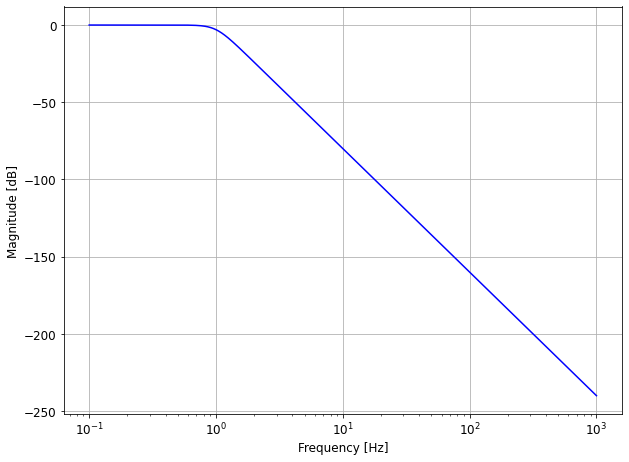

In [7]:
order = 4 
fc = 1

b, a = signal.butter(order, 2*np.pi*fc, 'low', analog=True)
butter_4 = signal.TransferFunction(b, a)
f = np.logspace(fc - 2, fc + 2, 1000)
w = 2*np.pi*f
w, mag_butter, phase_butter = butter_4.bode(w)
tin = np.linspace(0, 20/fc/2/np.pi, 1000)
tout1, step_butter = signal.step(butter_4, X0=None, T=tin)

plot_logxy(f, mag_butter, 'Frequency [Hz]', 'Magnitude [dB]')

 - No ripple in the passband, and minimal attenuation at low frequencies (approximately $0.1dB$ up to $f_c∕2$)
 - However, the passband “droop" begins early, resulting in $-3dB$ attenuation at $f_c$
 - The stopband begins somewhat late, due to the slow transition from the passband

## Chebyshev filter

 - Maximum flatness in the passband may not be critical, as long as peaking is kept below some critical value (e.g. $0.1$ or $0.5dB$) 
 - Chebyshev filters achieve much steeper roll-off in the transition band at the expense of increased ripple in the passband
 - This tradeoff often proves beneficial, as design specifications can be achieved with fewer poles (relative to a Butterworth design) 
 - The magnitude response of a Chebyshev filter is given by

$$ \left| \dfrac{V_{out}}{V_{in}} \right| = \dfrac{1}{\sqrt{1+\epsilon^2C_n^2(f/f_c)^{2n}}}$$

  - where $C_n$ is an $n^{th}$-order Chebyshev polynomial and $\epsilon$ is a constant that determines the passband ripple (2nd order $Q$ factor depends on $\epsilon$)


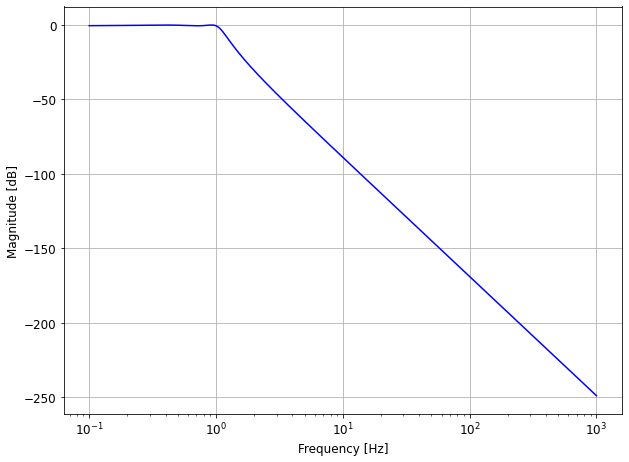

In [8]:
b, a = signal.cheby1(order, .5, 2*np.pi*fc, 'low', analog=True)
cheby_4 = signal.TransferFunction(b, a)
w, mag_cheby, phase_cheby = cheby_4.bode(w)
tout2, step_cheby = signal.step(cheby_4, X0=None, T=tin) 

plot_logxy(f, mag_cheby, 'Frequency [Hz]', 'Magnitude [dB]')

 - Designed for a sharp transition region, which is a trade-off for ripple in the passband
 - For a Chebyshev design, $f_c$ is defined as the frequency at which the response exits the ripple band
 - The narrower filter bandwidth can reduce noise and improve SNR (depending on ripple spec and filter order)

## Bessel filter

 - The magnitude response of the Bessel filter exhibits even more “passband droop” than the Butterworth filter
 - $f_c$ for a $2^{nd}$ order Bessel filter is $1.272$ times lower than $f_0$ for $-3dB$ attenuation at $f_c$
 - The primary advantage of the Bessel filter lies in the phase domain, with a parameter called constant “group delay”, which ensures equal time delays for signal components at different frequencies

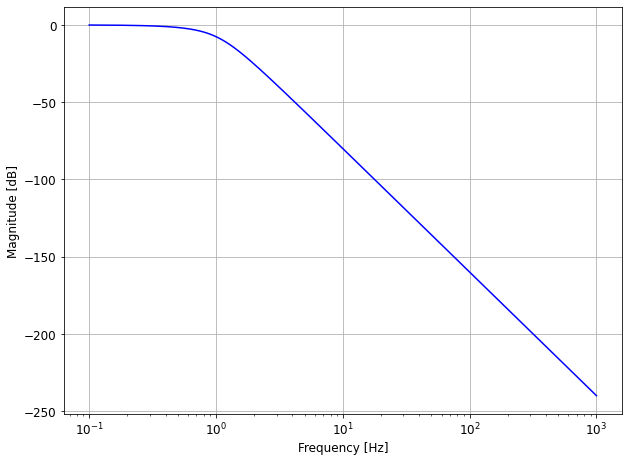

In [9]:
b, a = signal.bessel(order, 2*np.pi*fc, 'low', analog=True)
bessel_4 = signal.TransferFunction(b, a)
w, mag_bessel, phase_bessel = bessel_4.bode(w)
tout3, step_bessel = signal.step(bessel_4, X0=None, T=tin) 

plot_logxy(f, mag_bessel, 'Frequency [Hz]', 'Magnitude [dB]')

## Bessel group delay

 - Group delay is the time delay for different frequencies through a filter or system
 - It is defined as the derivative of phase with respect to frequency 
 - A constant group delay (equivalent to linear phase) means that different frequency sinusoids pass through with identical time delays
 - Bessel filters exhibit maximally flat group delay, similar to the magnitude of a Butterworth filter

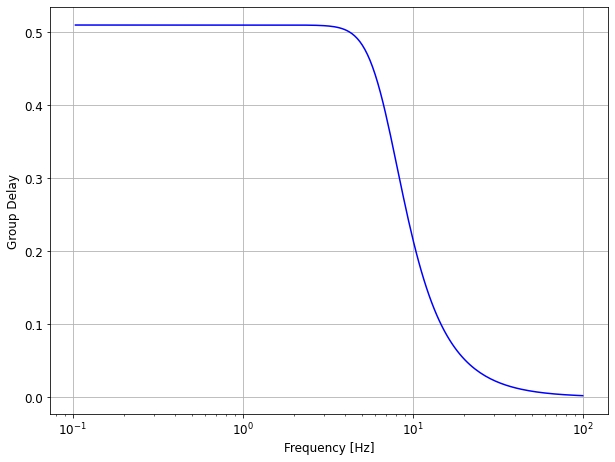

In [10]:
w_gd, h = signal.freqs(b,a)
group_delay = -np.diff(np.unwrap(np.angle(h)))/np.diff(w_gd)

plot_logxy(w_gd[1:], group_delay, 'Frequency [Hz]', 'Group Delay')

## Magnitude response comparison

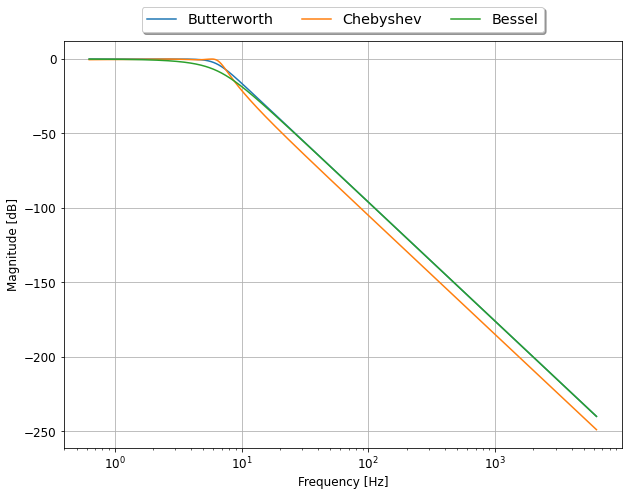

In [11]:
plot_logx3y(w, mag_butter, mag_cheby, mag_bessel,
           'Frequency [Hz]', 'Magnitude [dB]', 
           'Butterworth', 'Chebyshev', 'Bessel')

 - __Butterworth__: maximally flat, minor peaking
 - __Chebyshev__: widest passband, with ripple as a design parameter
 - __Bessel__: Almost no peaking, slower transition to maximum roll-off

## Step response comparison

IndexError: index 1000 is out of bounds for axis 0 with size 1000

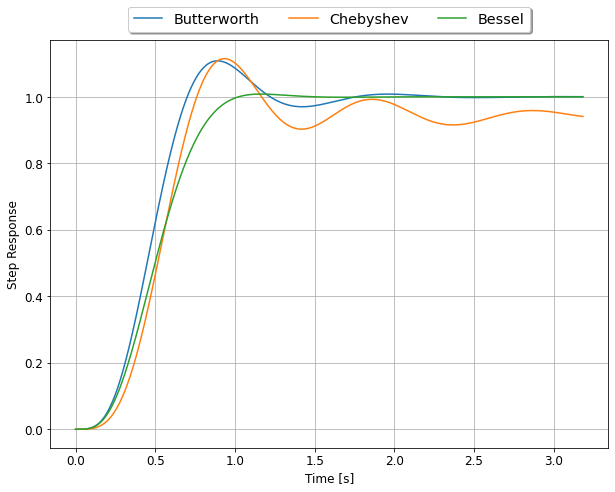

In [18]:
plot_x3y(tout1, step_butter, step_cheby, step_bessel, 
        'Time [s]', 'Step Response', 'Butterworth',
        'Chebyshev', 'Bessel')
step_butter[1000]

 - The Chebyshev trades its sharp transition and wide passband in the for significant ringing in the time domain
 - The Bessel filter exhibits almost no overshoot or ringing, and has a slower rise time ($t_r$)
 - The Butterworth filter constitutes the middle ground of the three in both the frequency and the time domain, with moderate peaking (frequency domain) and ringing (time domain)

## Filter performance comparison

<center><img src="img/filter_comparison_table.png" width=1500></center> 

## Sallen-Key filter (lowpass)

<center><img src="img/sallen_key_lp_gain.png" width=800></center> 

\begin{align}
\dfrac{V_{out}}{V_{in}} &=  \\
&=\dfrac{\left(1+\dfrac{R_4}{R_3} \right)}{s^2 R_1R_2C_1C_2 + s\left(R_1C_2+R_2C_1+R_1C_2\dfrac{-R_4}{R_3}\right) + 1}
\end{align}


 - Similar to the cascade of two RC stages, with the bottom of $C_1$ “bootstrapped” by a non-inverting amplifier
 - The energy loss in the RC cascade is compensated by the opamp, raising the Q factor
 - Similar configurations can be used to realize highpass and bandpass filters


## Sallen-Key transfer function

 - We can design the Sallen-Key active filter by relating its transfer function to the standard second-order form and determining expressions for $\omega_0$ and $Q$

\begin{align}
\dfrac{V_{out}}{V_{in}} &=  \dfrac{\left(1+\dfrac{R_4}{R_3} \right)}{s^2 R_1R_2C_1C_2 + s\left(R_1C_2+R_2C_1+R_1C_2\dfrac{-R_4}{R_3}\right) + 1} 
 = K\cdot\dfrac{\omega_0^2}{s^2 + \dfrac{\omega_0}{Q}s + \omega_0^2} \\
\end{align}

 - This results in the following expressions for $\omega_0$ and $Q$:

$$ \omega_0 = \sqrt{\dfrac{1}{R_1R_2C_1C_2}} \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: Q =  \dfrac{\sqrt{R_1R_2C_1C_2}}{R_1C_1 + R_2C_1+R_1C_2(1-K)}$$

 - Component values $R_1$, $R_2$, $C_1$, and $C_2$ are selected to achieve a desired response (e.g. Butterworth, Chebyshev, etc.) 
 - Design of Sallen–Key highpass and bandpass structures is similar, with the exception that the impedances need to be modified

## Generalized design approach

 - A generalized design approach for low-pass filters is presented by James Karki of Texas Instruments here: [Active Low-Pass Filter Design](https://www.ti.com/lit/an/sloa049b/sloa049b.pdf?ts=1605751819040)
 - This approach utilizes ratios of component values to achieve a desired response with arbitrary gain, including a gain of 1
 - The basic approach is as follows
    - Choose ratios m and n to achieve the desired value of $Q$
    - Select component values to achieve the target value of $f_c$


## Second-order Butterworth

 - The approach in Karki's application note is as follows
 - Defining parameters $m$, $n$, and $\tau$ as
 
$$ m = \dfrac{R_1}{R_2} \:\:\:\: n = \dfrac{C_2}{C_1} \:\:\:\: \tau = R_2C_1 $$

 - The second-order section as a cutoff frequency given by
 
$$ f_c = \dfrac{1}{2\pi\tau\sqrt{mn}} $$

 - And $Q$ given by 

$$ Q = \dfrac{\sqrt{mn}}{1+m+mn(1-K)} $$

<center><img src="img/sallen_key_lp.png" width=800></center> 

 - As an example, let's design a lowpass filter with $K=1$ and $f_c = 1kHz $
 - For a Butterworth response, we want

$$ Q = \dfrac{1}{\sqrt{2}} $$

 - Let's use the above formulae to design a lowpass Butterworth filter with $f_c = 1kHz$
 - We'll use several standard capacitor values by setting $C_1 = 10nF$ and $n = 3.3$ 

In [13]:
Q = 1/np.sqrt(2)
fsf = 1
fc = 1e3
n = 3.3
C = 10e-9
K = 1
C1, C2, R1, R2 = SK_lowpass(Q, fsf, fc, n, C, K)
print(C1)
print(C2)
print(R1)
print(R2)

1e-08
3.3e-08
4190.455732483218
18317.452171444438


 - Let's compare the resulting response with that of an ideal second-order Butterworth

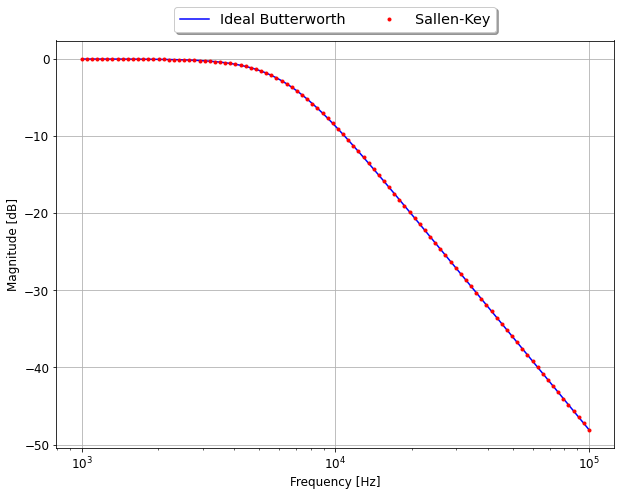

In [14]:
# Ideal second-order butterworth
b, a = signal.butter(2, 2*np.pi*fc, 'low', analog=True)
butter_2 = signal.TransferFunction(b, a)
w, mag_ideal, phase_ideal = butter_2.bode()

# Sallen-key design
Q = np.sqrt(R1*R2*C1*C2)/(R1*C1+R2*C1)
w0 = 1/np.sqrt(R1*R2*C1*C2)
sk_butter = signal.TransferFunction([w0**2], [1, w0/Q, w0**2])
w, mag_sk, phase_sk = sk_butter.bode(w)

plot_logx2y(w, mag_ideal, mag_sk, 'Frequency [Hz]', 
            'Magnitude [dB]', 'Ideal Butterworth', 'Sallen-Key')

## Ratio-based design approach

<center><img src="img/sallen_key_lp.png" width=700></center> 

$$ \omega_0 = \dfrac{1}{\tau\sqrt{mn}} = c_n \omega_c \:\:\:\: Q = \dfrac{\sqrt{mn}}{1+m} $$

$$ m = \dfrac{R_1}{R_2} \:\:\:\: n = \dfrac{C_2}{C_1} $$

$$\tau = R_2 C_1 $$

 1. Determine the values of $\omega_0$ and $Q$ needed for the desired response; $c_n$ depends on the type of filter (e.g. Butterworth, Chebyshev )
 2. *Choose* either $m$ or $n$ and calculate the other based on the target 𝑄
 3.  Choose either $R_2$ or $C_1$, and calculate the other based on $\tau$
 4.  Calculate the remaining component values from $m$ and $n$

## Higher-order filters

<center><img src="img/sallen_key_4th_order_lp.png" width=1200></center> 

 - Higher order and bandpass filters are typically constructed as cascades of $1^{st}$ and $2^{nd}$ order stages
 - To realize the desired response, $f_c$ and $Q$ for each stage are different from the values used in a second-order design
 - For higher order filters, it is generally more practical to use a table-based approach or a filter design tool (e.g. [TI Filter Design Tool](https://www.ti.com/design-resources/design-tools-simulation/filter-designer.html))
